Antes de iniciar, seguir o [passo a passo de instalação](./readme.md)

In [1]:
from pathlib import Path as _Path

import pandas as _pd
import nltk as _nltk
import matplotlib.pyplot as _plt

from wordcloud import WordCloud as _WordCloud

from sklearn.model_selection import train_test_split as _train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer as _TfidfVectorizer
from sklearn.metrics import accuracy_score as _accuracy_score

from sklearn.naive_bayes import MultinomialNB as _MultinomialNB

In [2]:
_nltk.download("stopwords")
_nltk.download("rslp")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAVI_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\DAVI_\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [3]:
# Modifique para seu caminho completo da raiz do repositório clonado
base_path = _Path("D:/programming/project/git/python/uninter")

In [4]:
base_path_course = base_path / "tecnologia_em_ciencia_de_dados/natural_language_processing/trabalho_1"
base_path_data = base_path_course / "data"

In [5]:
path_csv_input = base_path_data / "pre-processed.csv"

In [6]:
RU = "RU: 4819068"

In [7]:
df_csv_input = (
    _pd.read_csv(path_csv_input, usecols=["label", "preprocessed_news"])
    .assign(
        label=lambda df: (
            df["label"]
            .str.strip()
            .str.lower()
        ),
        normalized_preprocessed_news=lambda df: (
            df["preprocessed_news"]
            .copy(True)
            .str.replace(r"\s{2,}", " ", regex=True)
            .str.strip()
            .str.lower()
        ),
    ).astype({
        "label": "category",
        "preprocessed_news": "string",
        "normalized_preprocessed_news": "string",
    })
)

df_csv_input

,label,preprocessed_news,normalized_preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...,radialista americano fala sobre pt vendem ilus...
...,...,...,...
7195,true,jornal britanico acao contra lula lava jato se...,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...,setembro boa noite aqui estao principais notic...


In [8]:
max_word_length = int(df_csv_input[df_csv_input["label"] == "fake"]["preprocessed_news"].str.split().apply(lambda x: len(x)).mean())
max_word_length

107

In [9]:
def trunc_word(text: str, n_word: int) -> str:
    palavras = text.split()
    return " ".join(palavras[:n_word])

In [10]:
df_csv_input["normalized_preprocessed_news"] = (
    df_csv_input["normalized_preprocessed_news"]
    .apply(lambda texto: trunc_word(texto, max_word_length))
    .str.replace(r"[^0-9a-zA-Z\s]+", "", regex=True)
)
df_csv_input

,label,preprocessed_news,normalized_preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...,radialista americano fala sobre pt vendem ilus...
...,...,...,...
7195,true,jornal britanico acao contra lula lava jato se...,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...,setembro boa noite aqui estao principais notic...


In [11]:
stop_words = set(_nltk.corpus.stopwords.words("portuguese"))
stop_words

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [12]:
stemmer = _nltk.stem.RSLPStemmer()

In [13]:
def not_raised_stem(word: str) -> str:
    try:
        return stemmer.stem(word)
    except:
        return ""

In [14]:
df_csv_input["normalized_preprocessed_news"] = (
    df_csv_input["normalized_preprocessed_news"]
    .str.replace(r"[^0-9a-zA-Z\s]+", "", regex=True)
    .apply(lambda s: " ".join(not_raised_stem(x) for x in s.split(" ") if x not in stop_words))
)
df_csv_input

,label,preprocessed_news,normalized_preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...,kat abr diz vai coloc expulsa mold nao reclam ...
1,fake,ray peita bolsonaro conservador fake entrevist...,ray peit bolsonar conserv fak entrev danil gen...
2,fake,reinaldo azevedo desmascarado policia federal ...,reinald azeved desmascar polic feder ferrenh c...
3,fake,relatorio assustador bndes mostra dinheiro pub...,relatori assust bnd mostr dinh publ brasil jor...
4,fake,radialista americano fala sobre pt vendem ilus...,radial americ fal sobr pt vend ilusa pov brasi...
...,...,...,...
7195,true,jornal britanico acao contra lula lava jato se...,jorn britan aca contr lul lav jat ser julg sec...
7196,true,temer diz acionou pf cade investigar aumentos ...,tem diz acion pf cad investig aument prec gaso...
7197,true,obstaculos politicos temer especialistas ouvid...,obstacul poli tem especi ouv aval alem ter con...
7198,true,setembro boa noite aqui estao principais notic...,setembr boa noit aqu esta princip notic voc te...


In [15]:
tmp_ixd = 3601
print(df_csv_input["preprocessed_news"][tmp_ixd])
print(df_csv_input["normalized_preprocessed_news"][tmp_ixd])

bolsonaro liberal completo diz presidente psl partido pouca expressao nacional psl vive momentos destaque inedito trajetoria duas decadas dia sigla anunciou receberia jair bolsonaro presidencia republica palavra filiacao nao consta termo divulgado imprensa presidente psl deputado federal luciano bivar pe diz folha tao certo dois dois sao quatro hoje psc migrara partido marco acordo segundo colocado corrida presidencial ate momento segundo pesquisas datafolha lancou luz sobre sigla nanica tambem provocou cisao movimento livres rompeu uniao quase dois anos psl objetivo refundar partido nova lideranca lideres grupo bolsonaro representa extremo oposto valores liberais tanto termos economicos quanto comportamentais deveriam nortear nova fase partido bivar entretanto diz criticas sao preconceituosas absurdo maior parte partido favoravel uniao ter preconceito contra pessoa fundamentalismo lamento bolsonaro representa diz bivar principios fundadores partido economia mercado liberdades individu

In [16]:
x = df_csv_input["normalized_preprocessed_news"]
y = df_csv_input["label"]

x_training, x_test, y_training, y_test = _train_test_split(
    x, y,
    test_size=0.25,
    random_state=42,
    stratify=y,
)

In [17]:
vectorizer = _TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=7000,
    min_df=5,
    max_df=0.7,
)

In [18]:
x_training_tfidf = vectorizer.fit_transform(x_training)
x_training_tfidf.shape

(5400, 7000)

In [19]:
x_test_tfidf = vectorizer.transform(x_test)
x_test_tfidf.shape

(1800, 7000)

In [20]:
model = _MultinomialNB()
model.fit(x_training_tfidf, y_training)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [21]:
y_pred = model.predict(x_test_tfidf)
y_pred

array(['true', 'fake', 'true', ..., 'true', 'true', 'fake'],
      shape=(1800,), dtype='<U4')

In [22]:
accuracy = _accuracy_score(y_test, y_pred)
accuracy

0.86

In [23]:
x_training_tfidf = vectorizer.transform(x_training)

In [24]:
df_tfidf = _pd.DataFrame(x_training_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,abaix,abaix algum,abaix fat,abaix integr,abaix trech,abaix vide,abal,abandon,abastec,abat,...,zez,zez perrell,zik,zik viru,zomb,zon,zon nort,zon oest,zon sul,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097804,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.132837
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.445735,0.101856,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.09358,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073008,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [25]:
df_tfidf["label"] = y_training.values

In [26]:
df_true = df_tfidf[df_tfidf["label"] == "true"]
df_true

,abaix,abaix algum,abaix fat,abaix integr,abaix trech,abaix vide,abal,abandon,abastec,abat,...,zez perrell,zik,zik viru,zomb,zon,zon nort,zon oest,zon sul,zuckerberg,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.097804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132837,true
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
7,0.053201,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
5395,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
5396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true
5397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.073008,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,true


In [27]:
sum_true_score = df_true.drop(columns="label").sum()
sum_true_score

abaix           15.314549
abaix algum      0.287313
abaix fat        1.505342
abaix integr     7.034654
abaix trech      0.276612
                  ...    
zon              8.862992
zon nort         1.770511
zon oest         2.553128
zon sul          3.669278
zuckerberg       1.171309
Length: 7000, dtype: float64

In [28]:
wordcloud_true = _WordCloud(
    width=800,
    height=500,
    background_color="white",
    colormap="Greens",
    max_words=100,
).generate_from_frequencies(sum_true_score)

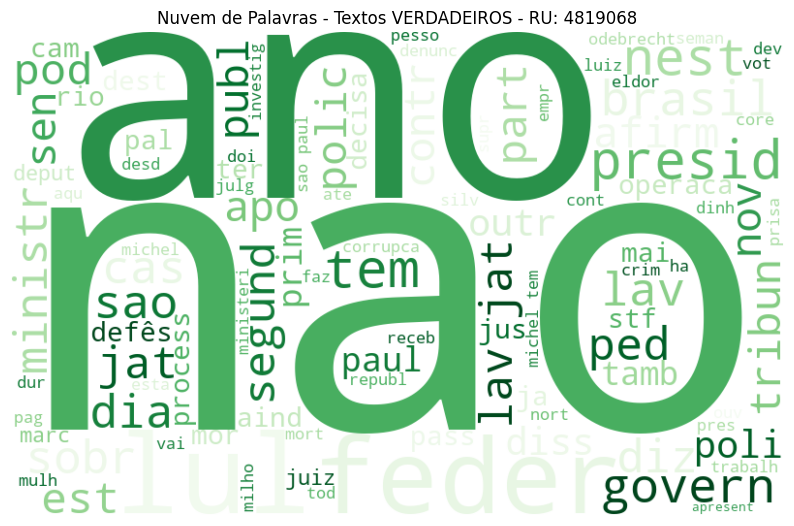

In [29]:
_plt.figure(figsize=(10, 8))
_plt.imshow(wordcloud_true, interpolation="bilinear")
_plt.title(f"Nuvem de Palavras - Textos VERDADEIROS - {RU}")
_plt.axis("off")
_plt.show()

In [30]:
total_terms = len(vectorizer.get_feature_names_out())
total_terms

7000

In [31]:
df_fake = df_tfidf[df_tfidf["label"] == "fake"]

In [32]:
sum_fake_score = df_fake.drop(columns="label").sum()
sum_fake_score

abaix           16.207918
abaix algum      1.251621
abaix fat        0.000000
abaix integr     0.444499
abaix trech      1.917249
                  ...    
zon              2.602500
zon nort         0.714338
zon oest         0.305556
zon sul          1.315493
zuckerberg       1.297569
Length: 7000, dtype: float64

In [33]:
wordcloud_fake = _WordCloud(
    width=800,
    height=500,
    background_color="white",
    colormap="Reds",
    max_words=100,
).generate_from_frequencies(sum_fake_score)

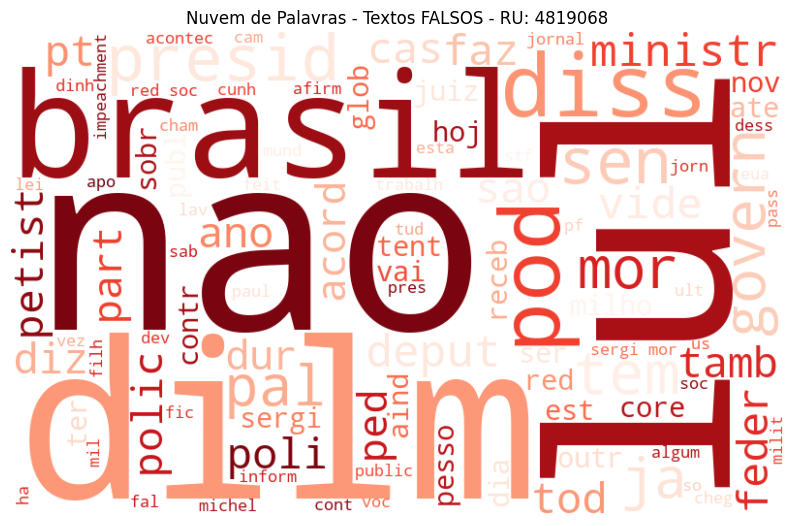

In [35]:
_plt.figure(figsize=(10, 8))
_plt.imshow(wordcloud_fake, interpolation="bilinear")
_plt.title(f"Nuvem de Palavras - Textos FALSOS - {RU}")
_plt.axis("off")
_plt.show()